In [1]:
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('notebook')

from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import auc, roc_curve, roc_auc_score

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

sns.set(style='white', context='notebook', palette='deep')

In [225]:
data = pd.read_excel("data.xls")
data.head()

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0


In [226]:
colunas= data.iloc[0]
data  = pd.DataFrame(data.values[1:], columns=colunas)
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


# Data Prep

In [227]:
data.shape

(30000, 25)

In [228]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          30000 non-null  object
 1   LIMIT_BAL                   30000 non-null  object
 2   SEX                         30000 non-null  object
 3   EDUCATION                   30000 non-null  object
 4   MARRIAGE                    30000 non-null  object
 5   AGE                         30000 non-null  object
 6   PAY_0                       30000 non-null  object
 7   PAY_2                       30000 non-null  object
 8   PAY_3                       30000 non-null  object
 9   PAY_4                       30000 non-null  object
 10  PAY_5                       30000 non-null  object
 11  PAY_6                       30000 non-null  object
 12  BILL_AMT1                   30000 non-null  object
 13  BILL_AMT2                   30000 non-null  ob

In [229]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object', name=0)

In [230]:
data.isnull().sum()

0
ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [231]:
list_val = ['default payment next month', 'AGE','LIMIT_BAL', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

In [232]:
for i in list_val:
    data[i] = data[i].astype("float64")

In [233]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  object 
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  object 
 5   AGE                         30000 non-null  float64
 6   PAY_0                       30000 non-null  float64
 7   PAY_2                       30000 non-null  float64
 8   PAY_3                       30000 non-null  float64
 9   PAY_4                       30000 non-null  float64
 10  PAY_5                       30000 non-null  float64
 11  PAY_6                       30000 non-null  float64
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [234]:
data = data.drop([
    "ID",
], axis=1)

# Análise Descritiva

In [188]:
null_columns = np.where(data.isna().sum() > 0)[0]
prop = (len(null_columns) / data.shape[1])*100    
prop

0.0

In [189]:
pd.value_counts(data['default payment next month'])

0    23364
1     6636
Name: default payment next month, dtype: int64

Class 0: 0.7788
Class 1: 0.2212
Proportion: 0.28 : 1


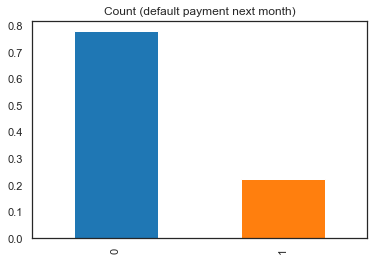

In [190]:
exam_result_count = data['default payment next month'].value_counts(normalize=True)
print('Class 0:', exam_result_count[0])
print('Class 1:', exam_result_count[1])
print('Proportion:', round(exam_result_count[1] / exam_result_count[0], 2), ': 1')

exam_result_count.plot(kind='bar', title='Count (default payment next month)',color = ['#1F77B4', '#FF7F0E']);

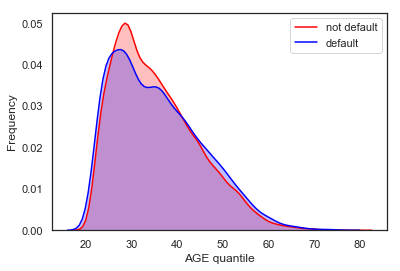

In [191]:
g = sns.kdeplot(data["AGE"][(data["default payment next month"] == 0) & (data["AGE"].notnull())], color="Red", shade = True)
g = sns.kdeplot(data["AGE"][(data["default payment next month"] == 1) & (data["AGE"].notnull())], ax =g, color="Blue", shade= True)
g.set_xlabel("AGE quantile")
g.set_ylabel("Frequency")
g = g.legend(["not default","default"])

In [192]:
pd.value_counts(data['EDUCATION'])

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [193]:
pd.value_counts(data['MARRIAGE'])

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [194]:
pd.value_counts(data['SEX'])

2    18112
1    11888
Name: SEX, dtype: int64

c:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


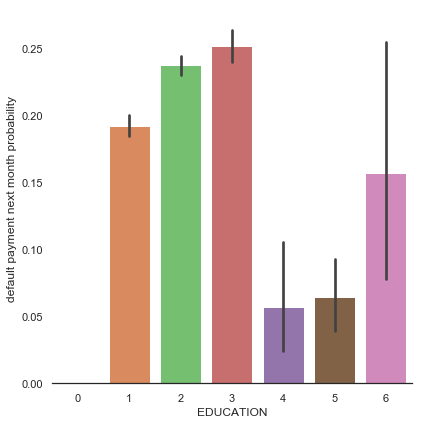

In [195]:
g = sns.factorplot(x="EDUCATION",y="default payment next month",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("default payment next month probability")

c:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


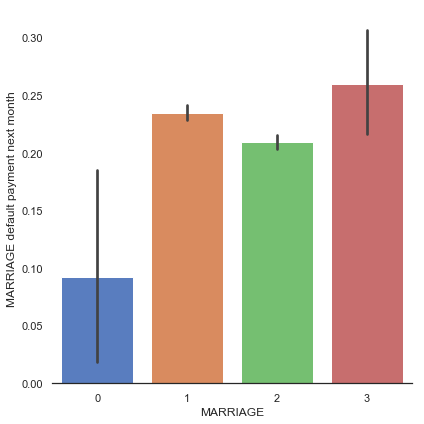

In [196]:
g  = sns.factorplot(x="MARRIAGE",y="default payment next month",data=data,kind="bar", size = 6 , 
palette = "muted")
g.despine(left=True)
g = g.set_ylabels("MARRIAGE default payment next month")

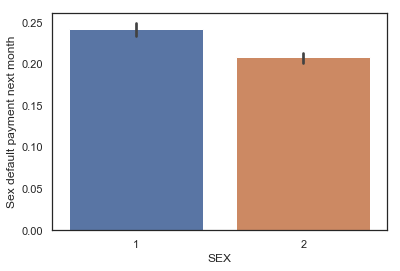

In [197]:
g = sns.barplot(x="SEX",y="default payment next month",data=data)
g = g.set_ylabel("Sex default payment next month")

c:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


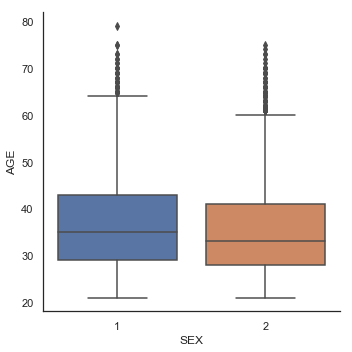

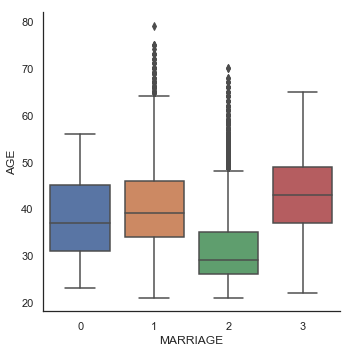

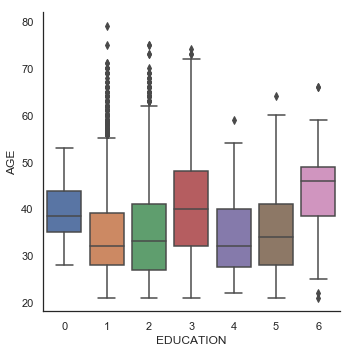

In [198]:
g = sns.factorplot(y="AGE",x="SEX",data=data,kind="box")
g = sns.factorplot(y="AGE",x="MARRIAGE", data=data,kind="box")
g = sns.factorplot(y="AGE",x="EDUCATION", data=data,kind="box")

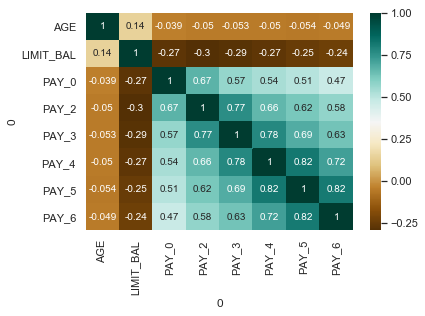

In [199]:
g = sns.heatmap(data[['AGE','LIMIT_BAL', 'PAY_0','PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']].corr(),cmap="BrBG",annot=True)

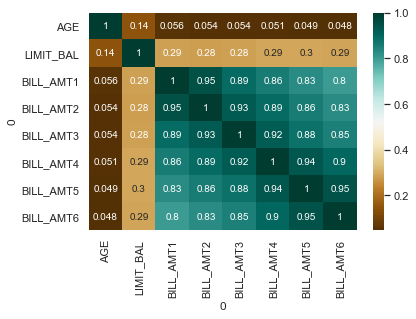

In [200]:
g = sns.heatmap(data[['AGE','LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']].corr(),cmap="BrBG",annot=True)

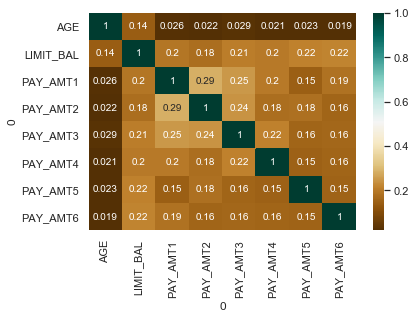

In [201]:
g = sns.heatmap(data[['AGE','LIMIT_BAL', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']].corr(),cmap="BrBG",annot=True)

c:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


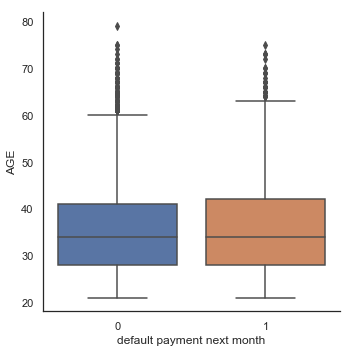

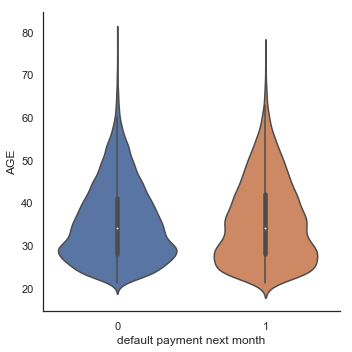

In [202]:
g = sns.factorplot(x="default payment next month", y = "AGE",data = data, kind="box")
g = sns.factorplot(x="default payment next month", y = "AGE",data = data, kind="violin")

# Model

In [235]:
data.groupby("default payment next month").count()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default payment next month,,,,,,,,,,,,,,,,,,,,,
0.0,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364,...,23364,23364,23364,23364,23364,23364,23364,23364,23364,23364
1.0,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636,...,6636,6636,6636,6636,6636,6636,6636,6636,6636,6636


In [236]:
df_x = data.drop([
'default payment next month'
], axis=1)

In [237]:
df_x.dtypes[(df_x.dtypes == "object")].index

Index(['SEX', 'EDUCATION', 'MARRIAGE'], dtype='object', name=0)

In [240]:
df_x = pd.concat([df_x, pd.get_dummies(df_x[df_x.dtypes[(df_x.dtypes == "object")].index])], axis=1).drop(
    df_x.dtypes[(df_x.dtypes == "object")].index, axis=1)
df_x.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,20000.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,...,0,1,0,0,0,0,0,1,0,0
1,120000.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,...,0,1,0,0,0,0,0,0,1,0
2,90000.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,...,0,1,0,0,0,0,0,0,1,0
3,50000.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,...,0,1,0,0,0,0,0,1,0,0
4,50000.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,...,0,1,0,0,0,0,0,1,0,0


In [241]:
df_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   LIMIT_BAL    30000 non-null  float64
 1   AGE          30000 non-null  float64
 2   PAY_0        30000 non-null  float64
 3   PAY_2        30000 non-null  float64
 4   PAY_3        30000 non-null  float64
 5   PAY_4        30000 non-null  float64
 6   PAY_5        30000 non-null  float64
 7   PAY_6        30000 non-null  float64
 8   BILL_AMT1    30000 non-null  float64
 9   BILL_AMT2    30000 non-null  float64
 10  BILL_AMT3    30000 non-null  float64
 11  BILL_AMT4    30000 non-null  float64
 12  BILL_AMT5    30000 non-null  float64
 13  BILL_AMT6    30000 non-null  float64
 14  PAY_AMT1     30000 non-null  float64
 15  PAY_AMT2     30000 non-null  float64
 16  PAY_AMT3     30000 non-null  float64
 17  PAY_AMT4     30000 non-null  float64
 18  PAY_AMT5     30000 non-null  float64
 19  PAY_

In [242]:
X_all = df_x
y_all = data['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.20 ,random_state = 79831)

print('Numero de observaçoes do treino:', len(X_train))
print('Numero de observaçoes da teste:',len(X_test))

Numero de observaçoes do treino: 24000
Numero de observaçoes da teste: 6000


In [243]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(missing_values=np.nan, strategy='median')
std = StandardScaler()   

X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

In [244]:
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import NearMiss

### Smote

In [252]:
smt = SMOTE(k_neighbors=5, random_state=42)
X_sampling, y_sampling = smt.fit_sample(X_train, y_train)

In [253]:
y_sampling

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
37383    1.0
37384    1.0
37385    1.0
37386    1.0
37387    1.0
Name: default payment next month, Length: 37388, dtype: float64

Class 0: 0.5
Class 1: 0.5
Proportion: 1.0 : 1


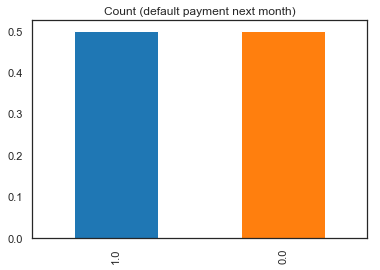

In [254]:
exam_result_count = y_sampling.value_counts(normalize=True)
print('Class 0:', exam_result_count[0])
print('Class 1:', exam_result_count[1])
print('Proportion:', round(exam_result_count[1] / exam_result_count[0], 2), ': 1')

exam_result_count.plot(kind='bar', title='Count (default payment next month)',color = ['#1F77B4', '#FF7F0E']);

In [248]:
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics  import auc, roc_curve, roc_auc_score

In [249]:
import time
from sklearn.metrics  import average_precision_score, make_scorer, roc_curve,f1_score, precision_score, recall_score, fbeta_score, auc, roc_auc_score, accuracy_score, confusion_matrix, classification_report,precision_recall_curve

In [250]:
from scipy.stats import ks_2samp
def fit_and_print(model):
    y_pred = model.predict(X_test)
    print("Confusion Matrix: \n", confusion_matrix(y_test, y_pred))  
    print("Classification Report: \n", classification_report(y_test, y_pred))  
    print("Accuracy Score: ", accuracy_score(y_test, y_pred))   
    print("Recall Score:", recall_score(y_test, y_pred))
    print("AUC: ", roc_auc_score(y_test, y_pred))
    print("KS: ", ks_2samp(y_pred[y_test == 0], y_pred[y_test == 1]).statistic)

In [255]:
# from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state = 665)

params = {'n_estimators' : [50,100, 200],    
          'max_depth': [10, 15, 20],
          'max_features': [20,25,30],
          'min_samples_split' : [0.01,0.05]
         }

grid = GridSearchCV(estimator = clf,
                          param_grid = params,
#                           scoring = make_scorer(roc_auc_score),
                          cv = 10 
)

inicio = time.time()
grid.fit(X_sampling, y_sampling)
fim = time.time()

print(fim - inicio)

print(grid.best_score_)
classif_final_RF = grid.best_estimator_
print(grid.best_estimator_)
print(grid.best_params_)

11449.789899587631
0.8593974821237715
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features=20,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=0.01,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=665,
                       verbose=0, warm_start=False)
{'max_depth': 20, 'max_features': 20, 'min_samples_split': 0.01, 'n_estimators': 200}


In [256]:
fit_and_print(classif_final_RF)

Confusion Matrix: 
 [[4295  375]
 [ 759  571]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.85      0.92      0.88      4670
         1.0       0.60      0.43      0.50      1330

    accuracy                           0.81      6000
   macro avg       0.73      0.67      0.69      6000
weighted avg       0.80      0.81      0.80      6000

Accuracy Score:  0.811
Recall Score: 0.4293233082706767
AUC:  0.6745117612017196
KS:  0.349023522403439


In [257]:
mlp = MLPClassifier()

parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['adaptive', 'constant'],
}

inicio = time.time()

clf_mlp = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=10)
clf_mlp.fit(X_sampling, y_sampling)

fim = time.time()

print(fim - inicio)

print(clf_mlp.best_score_)
classif_mlp = clf_mlp.best_estimator_
print(clf_mlp.best_estimator_)
print(clf_mlp.best_params_)

5250.479651927948
0.6341348354674335
MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}


c:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [258]:
fit_and_print(classif_mlp)

Confusion Matrix: 
 [[2430 2240]
 [ 468  862]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.84      0.52      0.64      4670
         1.0       0.28      0.65      0.39      1330

    accuracy                           0.55      6000
   macro avg       0.56      0.58      0.52      6000
weighted avg       0.71      0.55      0.59      6000

Accuracy Score:  0.5486666666666666
Recall Score: 0.6481203007518797
AUC:  0.5842314565857899
KS:  0.1684629131715799


In [259]:
test_Survived_RF = pd.Series(classif_final_RF.predict(X_test), name="Random Forest")
test_Survived_MLP = pd.Series(classif_mlp.predict(X_test), name="Multi-Layer Perceptron")

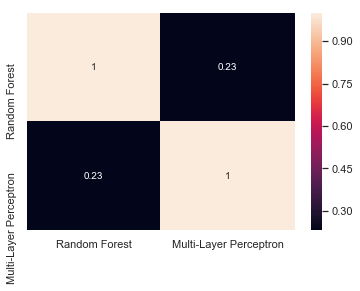

In [260]:
ensemble_results = pd.concat([test_Survived_RF,test_Survived_MLP],axis=1)
g= sns.heatmap(ensemble_results.corr(),annot=True)

In [261]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier

votingC = VotingClassifier(estimators=[('rfc', classif_final_RF), ('mlp', classif_mlp)], voting='soft', n_jobs=1)

votingC = votingC.fit(X_sampling,y_sampling)

c:\anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [262]:
fit_and_print(votingC)

Confusion Matrix: 
 [[4131  539]
 [ 799  531]]
Classification Report: 
               precision    recall  f1-score   support

         0.0       0.84      0.88      0.86      4670
         1.0       0.50      0.40      0.44      1330

    accuracy                           0.78      6000
   macro avg       0.67      0.64      0.65      6000
weighted avg       0.76      0.78      0.77      6000

Accuracy Score:  0.777
Recall Score: 0.39924812030075185
AUC:  0.6419152807071211
KS:  0.28383056141424223


In [263]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

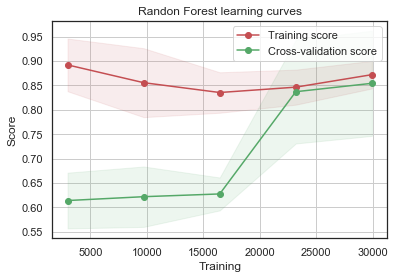

In [270]:
g = plot_learning_curve(classif_final_RF,"Randon Forest learning curves",X_sampling,y_sampling,cv=5)

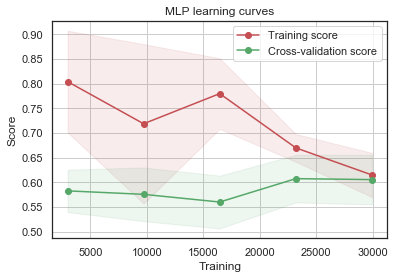

In [271]:
g = plot_learning_curve(classif_mlp ,"MLP learning curves",X_sampling,y_sampling,cv=5)

In [272]:
from sklearn.externals import joblib
import pickle

pickle.dump(imputer, open( "imputer.pickle", "wb" ))
pickle.dump(std, open( "std.pickle", "wb" ))
pickle.dump(smt, open( "smt.pickle", "wb" ))


filename_vot = 'RF_MPL_vot.sav'
joblib.dump(votingC, filename_vot)

['RF_MPL_vot.sav']